# `Desafio de Regressão do 5º Andar`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999 # Configuração pra ver mais linhas e colunas dos Datasets
pd.options.display.max_columns = 999

In [2]:
db = pd.read_csv('base.csv')

In [ ]:
db.info()

In [3]:
db['PrecoVenda'] = db['PrecoVenda'].astype('float')

In [ ]:
db.head()

In [ ]:
db.isnull()

In [ ]:
db.corr()

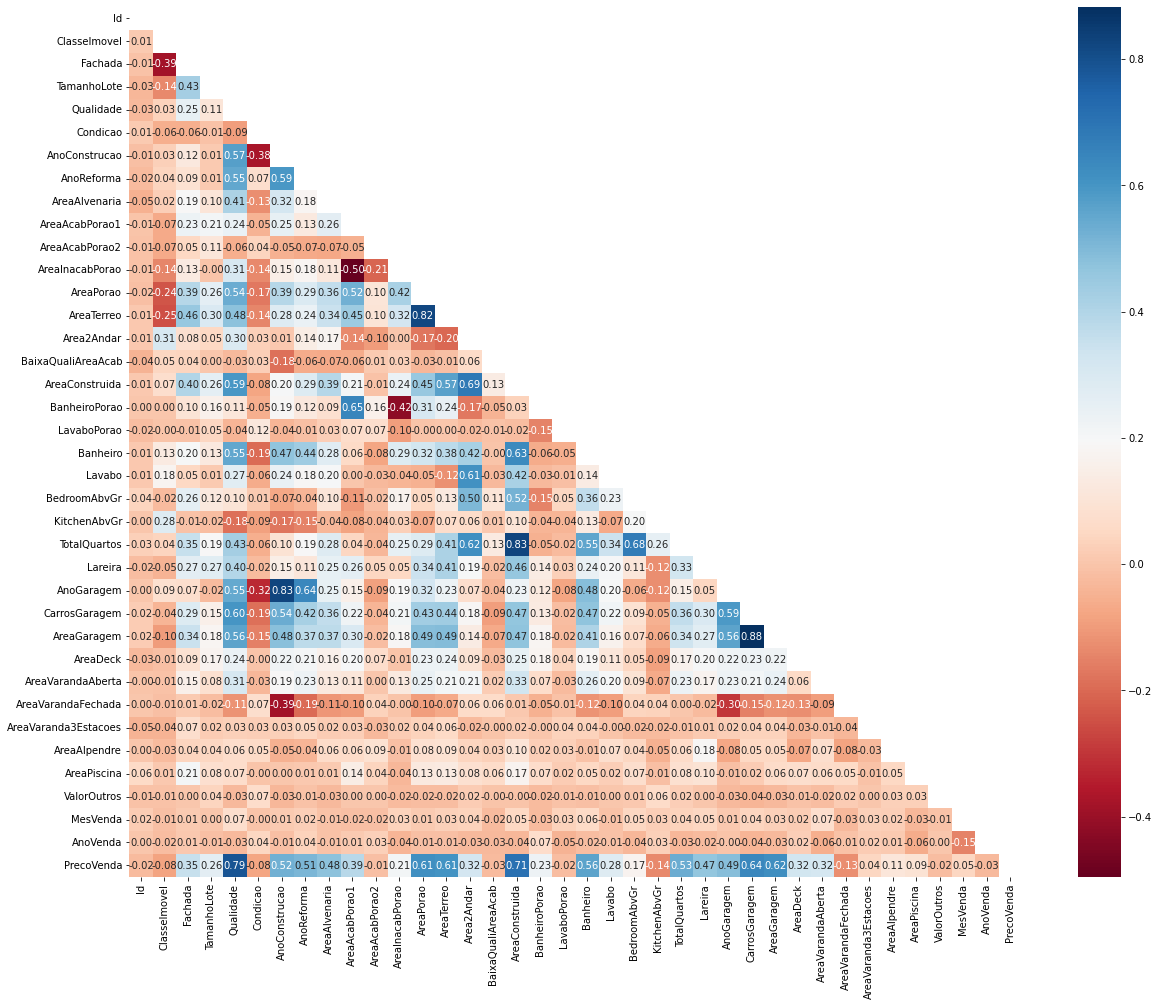

In [4]:
import numpy as np

# Plotando a matriz de correlações usando um Heatmap 

sns.set_context(font_scale=1.9)
plt.figure(figsize=(20,16))
sns.heatmap(
    db.corr(), 
    annot=True, 
    fmt='.2f', 
    cmap='RdBu', 
    mask=np.triu(np.ones_like(db.corr())) 
           )
plt.show()

### `Variáveis que possuem correlação mais forte com a Target (PreçoVenda):` 

Qualidade, AreaContruida

**kitchen ABGR e Área da Varanda Fechada, tem uma relação forte negativa**

In [5]:
db.drop(db.columns[[6, 72, 73, 74]], axis=1, inplace=True)

In [20]:
db.fillna(0, inplace=True)

In [6]:
# Percentual de casos faltantes (NaN)

db.isnull().mean().round(4)*100

Id                       0.00
ClasseImovel             0.00
ClasseZona               0.00
Fachada                 17.74
TamanhoLote              0.00
Rua                      0.00
FormaProp                0.00
PlanoProp                0.00
Servicos                 0.00
ConfigLote               0.00
InclinacaoLote           0.00
Bairro                   0.00
Estrada1                 0.00
Estrada2                 0.00
TipoHabitacao            0.00
EstiloHabitacao          0.00
Qualidade                0.00
Condicao                 0.00
AnoConstrucao            0.00
AnoReforma               0.00
TipoTelhado              0.00
MaterialTelhado          0.00
Exterior1                0.00
Exterior2                0.00
TipoAlvenaria            0.55
AreaAlvenaria            0.55
QualidadeCobertura       0.00
CondicaoExterna          0.00
TipoFundacao             0.00
AlturaPorao              2.53
CondicaoPorao            2.53
ParedePorao              2.60
TipoAcabPorao1           2.53
AreaAcabPo

In [ ]:
db.head(1)

In [ ]:
db.describe()

In [ ]:
sns.displot(db, x="PrecoVenda", kde=True)

Será necessário uma transformação logaritmica pois a Distribuição está Assimétrica Positiva

In [7]:
# Qualidade Material geral e qualidade de acabamento

label_quali = {
  "Qualidade": {1: 'Muito ruim', 2: 'Ruim', 3: 'Justo', 4: 'Abaixo da média', 5: 'Média', 6: 'Acima da média', 7: 'Bom', 8: 'Muito bom', 9: 'Excelente', 10: 'Muito excelente'},
  "Banheiro": {1: '1 Banheiro', 2: '2 Banheiros', 3: '3 Banheiros', 4: '4 Banheiros', 5: '5 Banheiros'},
  "TotalQuartos": {1: '1 Quarto', 2: '2 Quartos', 3: '3 Quartos', 4: '4 Quartos', 5: '5 Quartos', 6: '6 Quartos', 7: '7 Quartos', 8: '8 Quartos', 9: '9 Quartos', 10: '10 Quartos', 11: '11 Quartos', 12: '12 Quartos', 13: '13 Quartos', 14: '14 Quartos'},
  "KitchenAbvGr": {1: '1 Cozinha', 2: '2 Cozinhas', 3: '3 Cozinhas', 4: '4 Cozinhas', 5: '5 Cozinhas', 6: '6 Cozinhas', 7: '7 Cozinhas', 8: '8 Cozinhas', 9: '9 Cozinhas', 10: '10 Cozinhas'}
}

In [ ]:
# CATEGORIAS:

# 10 Muito excelente
# 9 Excelente
# 8 Muito bom
# 7 Bom
# 6 Acima da média
# 5 Média
# 4 Abaixo da média
# 3 Justo
# 2 Ruim
# 1 Muito ruim

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="PrecoVenda", y=variable, data=data)
    plt.ylabel(label)
    plt.show()

In [ ]:
grafico_boxplot_grp(db.replace(label_quali), "Qualidade", "Qualidade dos Materiais")

In [ ]:
from scipy.stats import f_oneway

db_aux = db[["Qualidade", "PrecoVenda"]].dropna()

stat, p = f_oneway(db_aux[(db_aux.Qualidade == 1)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 2)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 3)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 4)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 5)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 6)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 7)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 8)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 9)]["PrecoVenda"],
                   db_aux[(db_aux.Qualidade == 10)]["PrecoVenda"],)

print('stat=%.3f, p=%.3f' % (stat, p))

In [ ]:
# Teste Tukey para verificar aonde há diferença entre Qualidade X PrecoVenda

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(db_aux['PrecoVenda'],
                  db_aux['Qualidade'],
                  alpha = 0.05)

print(tukey)

Utilizei a Variável: 'Qualidade' para aplicar o teste T-Studant e Tukey, verificando que, de fato, há uma relação forte entres estas variáveis.

In [ ]:
db.plot('AnoReforma', 'PrecoVenda', kind='scatter', alpha=0.5)

In [ ]:
db.plot('AnoConstrucao', 'PrecoVenda', kind='scatter', alpha=0.5)

In [ ]:
db.plot('AreaPorao', 'PrecoVenda', kind='scatter', alpha=0.5)

In [ ]:
db.plot('AreaTerreo', 'PrecoVenda', kind='scatter', alpha=0.5)

In [ ]:
db.plot('AreaConstruida', 'PrecoVenda', kind='scatter', alpha=0.5)

In [ ]:
# Função para construir gráfico de barras

def grafico_barras_prop(data, variable):
    (data[[variable]]
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion"))
    plt.ylim(0,1)
    plt.show()

In [ ]:
grafico_barras_prop(db.replace(label_quali), variable = "Banheiro")

In [ ]:
grafico_boxplot_grp(db.replace(label_quali), "Banheiro", "Banheiros")

In [ ]:
grafico_boxplot_grp(db.replace(label_quali), "TotalQuartos", "Total de Quartos")

In [ ]:
grafico_boxplot_grp(db.replace(label_quali), "KitchenAbvGr", "Total de Cozinhas")

In [ ]:
db.plot('AreaGaragem', 'PrecoVenda', kind='scatter', alpha=0.5)

In [21]:
db['AreaConstruidaExterna'] = db['AreaGaragem'] + db['AreaDeck'] + db['AreaVarandaAberta'] + db['AreaVarandaFechada'] + db['Fachada'] + db['AreaPiscina'] + db['AreaVaranda3Estacoes']

db['AreaConstruidaExterna']

0        674.0
1        838.0
2        718.0
3       1009.0
4       1196.0
         ...  
1455     562.0
1456     934.0
1457     378.0
1458     786.0
1459    1155.0
Name: AreaConstruidaExterna, Length: 1460, dtype: float64

In [22]:
db['AreaConstruidaInterna'] = db['AreaPorao'] + db['AreaAcabPorao1'] + db['AreaTerreo'] + db['Area2Andar'] + db['AreaAlpendre'] + db['AreaAlvenaria']

db['AreaConstruidaInterna']

0       3468.0
1       3502.0
2       3354.0
3       2689.0
4       4348.0
         ...  
1455    2600.0
1456    4524.0
1457    3767.0
1458    2205.0
1459    3342.0
Name: AreaConstruidaInterna, Length: 1460, dtype: float64

In [23]:
db['NºComodos'] = db['TotalQuartos'] + db['Banheiro'] + db['Lavabo'] + db['BanheiroPorao'] + db['LavaboPorao'] + db['KitchenAbvGr'] + db['Lareira'] + db['BedroomAbvGr']

In [24]:
db1 = db[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao', 'PrecoVenda']]

db1.head()

,Qualidade,NºComodos,AnoReforma,AreaConstruidaExterna,AreaConstruidaInterna,AnoConstrucao,PrecoVenda
0,7,16,2003,674.0,3468.0,2003,208500.0
1,6,14,1976,838.0,3502.0,1976,181500.0
2,7,15,2002,718.0,3354.0,2001,223500.0
3,7,14,1970,1009.0,2689.0,1915,140000.0
4,8,19,2000,1196.0,4348.0,2000,250000.0


In [ ]:
# Média da Variavel Resposta (PrecoVenda) por Qualidade

db1.groupby('Qualidade').PrecoVenda.mean().to_frame()

In [ ]:
avgs = db1.groupby('Qualidade').PrecoVenda.mean().to_frame()
print('a diferença entre as Qualidades de Materiais é', (avgs.loc[10] - avgs.loc[1]).round(2).values[0])

In [ ]:
import statsmodels.formula.api as smf
modelo_treinado = smf.ols('PrecoVenda ~ 1 + Qualidade', data=db1).fit()
print(modelo_treinado.summary())

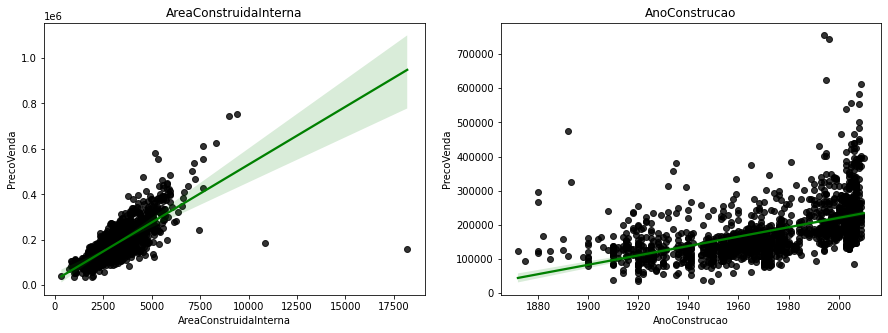

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(x="AreaConstruidaInterna", y="PrecoVenda", scatter_kws={"color": "black"}, line_kws={"color": "green"}, data=db1, ax=ax[0]).set(title='AreaConstruidaInterna');
sns.regplot(x="AnoConstrucao", y="PrecoVenda", scatter_kws={"color": "black"}, line_kws={"color": "green"}, data=db1, ax=ax[1]).set(title='AnoConstrucao');

**`Conclusão:`**

Há uma enorme tendência de casas grandes com mais cômodos serem mais valorizadas. Também é possível observar que Casas construidas com materias de melhor qualidade valem mais e, por último, construções mais recentes ou, recém reformadas possuem maior valor de mercado.

`Qualidade, Ano Construção, Ano reforma, AreaPorao, Area Terreo, Area Construída, Banheiro, Total Quartos, AreaGaragem, Lareira, AreaDeck, AreaVarandaAberta, AreaAvenaria`

In [ ]:
sns.displot(db1, x="Qualidade", kde=True)

In [ ]:
sns.displot(db1, x="NºComodos", kde=True)

In [ ]:
sns.displot(db1, x="AreaConstruidaExterna", kde=True)

C:\Users\Computer\AppData\Local\Temp/ipykernel_4520/2103768592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["AreaConstruidaExterna"] = np.log(db1["AreaConstruidaExterna"])


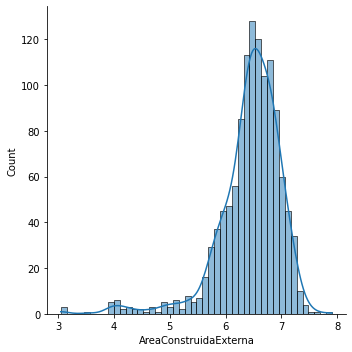

In [13]:
db1["AreaConstruidaExterna"] = np.log(db1["AreaConstruidaExterna"])

sns.displot(db1, x="AreaConstruidaExterna", kde=True)
plt.show()

In [ ]:
sns.displot(db1, x="AreaConstruidaInterna", kde=True)

C:\Users\Computer\AppData\Local\Temp/ipykernel_4520/2840067063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["AreaConstruidaInterna"] = np.log(db1["AreaConstruidaInterna"])


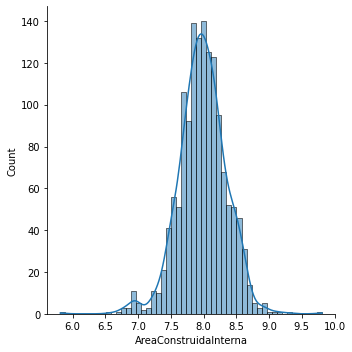

In [14]:
db1["AreaConstruidaInterna"] = np.log(db1["AreaConstruidaInterna"])

sns.displot(db1, x="AreaConstruidaInterna", kde=True)
plt.show()

In [ ]:
sns.displot(db1, x="AnoConstrucao", kde=True)

C:\Users\Computer\AppData\Local\Temp/ipykernel_4520/2952008492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["AnoConstrucao"] = np.log(db1["AnoConstrucao"])


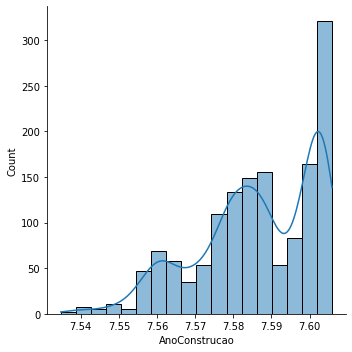

In [15]:
db1["AnoConstrucao"] = np.log(db1["AnoConstrucao"])

sns.displot(db1, x="AnoConstrucao", kde=True)
plt.show()

C:\Users\Computer\AppData\Local\Temp/ipykernel_4520/471955318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["AnoReforma"] = np.log(db1["AnoReforma"])


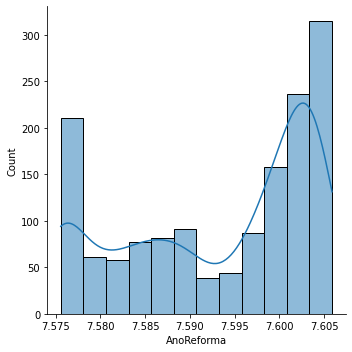

In [16]:
db1["AnoReforma"] = np.log(db1["AnoReforma"])

sns.displot(db1, x="AnoReforma", kde=True)
plt.show()

C:\Users\Computer\AppData\Local\Temp/ipykernel_4520/2165610848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db1["PrecoVenda"] = np.log(db1["PrecoVenda"])


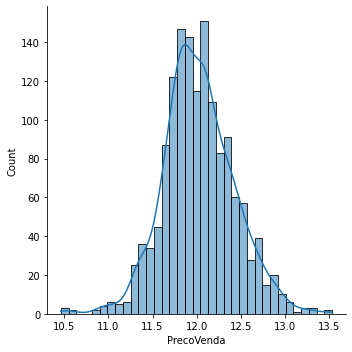

In [17]:
db1["PrecoVenda"] = np.log(db1["PrecoVenda"])

sns.displot(db1, x="PrecoVenda", kde=True)
plt.show()

In [27]:
Var_Ind_ = db[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']]

target = db[['PrecoVenda']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Var_Ind_, target,  test_size=0.2, random_state=42)

In [ ]:
import statsmodels.formula.api as sm

modelo = sm.ols(formula='PrecoVenda ~ 1 + Qualidade', data=db1.iloc[X_train.index,:]).fit()
modelo.summary()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def imprimir_metricas(model, X_train, X_test, y_train, y_test, name):
    train_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred)**0.5
    r2_train = r2_score(y_train, train_pred)

    test_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, test_pred)**0.5
    r2_test = r2_score(y_test, test_pred)

    print(f'''***{name}***
    treino
    RMSE: {round(rmse_train, 2)}
    R2: {round(r2_train, 2)}\n
    teste:
    RMSR: {round(rmse_test, 2)}
    R2: {round(r2_test, 2)}''')

In [ ]:
from sklearn.linear_model import LinearRegression

rls = LinearRegression()
rls.fit(X_train[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']], y_train)
rls.fit(X_test[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']], y_test)

imprimir_metricas(rls, X_train[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']], X_test[['Qualidade', 'NºComodos', 'AnoReforma', 'AreaConstruidaExterna', 'AreaConstruidaInterna', 'AnoConstrucao']], y_train, y_test, 'Regressão Linear Múltipla')

Podemos observar pelo teste Durbin-Watson que, há uma baixa autocorrelação positiva entre as variaveis explicativas. 

O R² aumenta, na medida que são acrescentadas Variaveis Explicativas e está em um valor satisfatória do quanto as Variaveis Explicativas respondem.

O RMSE tbm está satisfatório, pois reduziu a variação de Resíduos.

In [ ]:
db1.groupby('Qualidade').PrecoVenda.mean().plot(kind='bar')

In [ ]:
db1.boxplot(column=['PrecoVenda'], by='Qualidade');

In [ ]:
db1.corr()

In [ ]:
modelo = sm.ols(formula='PrecoVenda ~ 1 + AreaConstruidaInterna', data=db1.iloc[X_train.index,:]).fit()
modelo.summary()